# Goals


# Forecasting Models Based on Regression

Forecasting models based on regression are examples of explanatory models constructed under the assumption that there is a possible relationship between the variable to be forecast and a number of independent variables.

The term **regression** refers to a certain type of statistical model that attempts to describe the relationship of one variable, called the **dependent variable** (usually denoted by Y), and a number of other variables X₁, X₂, ..., Xₖ, called the **explanatory** or **independent variables**. We shall only consider the case of an additive error, represented by e, where the relationship can be written as:

$$ Y = f(X₁, ..., Xₖ; b₀, b₁, ..., bₚ) + e $$

Here:
- \(f\) is a given function known as the **regression function**.
- The function depends on parameters or coefficients, denoted by \(b₀, b₁, ..., bₚ\).
- The parameters' values are not known and need to be estimated.
- The number of regression parameters \(r = p + 1\) is not necessarily the same as \(k\).
- There is an additional uncertain element in the relationship, represented by the random variable \(e\).
- The probability distribution of \(e\) is usually specified, often assumed to be normal (N(0, σ²)), but with the variance $(\sigma²)$ unknown.

In [2]:
from pandas import read_excel
from statsmodels.formula.api import ols
series = read_excel('/home/shahid/ML/Numerical_analysis/Assistants_share/TimeSeries_AlainZemkoho_course/CodesANDdataSets/4-Regression/Bank.xls',
                    sheet_name='Data2', header=0,
                     dtype=float)

#reading the basic variables
DEOM = series.DEOM
AAA = series.AAA
Tto4 = series.Tto4
D3to4 = series.D3to4

#Regression model(s)
formula = 'DEOM ~ AAA + Tto4 + D3to4'

#Ordinary Least Squares (OLS)
results = ols(formula, data=series).fit()
print(results.summary())

# Here the main table is the first one,
# where the main statistics are the R-squared (line 1)
# and the P-value; i.e., Prob (F-statistic)

                            OLS Regression Results                            
Dep. Variable:                   DEOM   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     20.85
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           7.59e-09
Time:                        14:22:16   Log-Likelihood:                -112.87
No. Observations:                  53   AIC:                             233.7
Df Residuals:                      49   BIC:                             241.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3391      3.259     -1.331      0.1

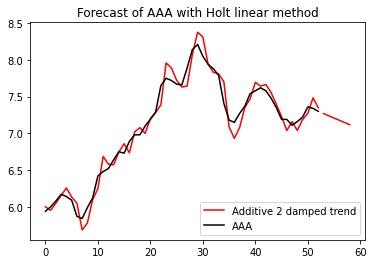

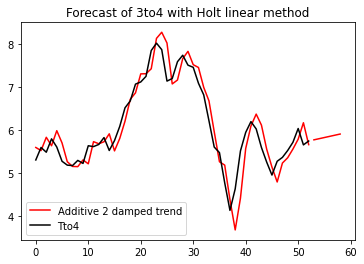

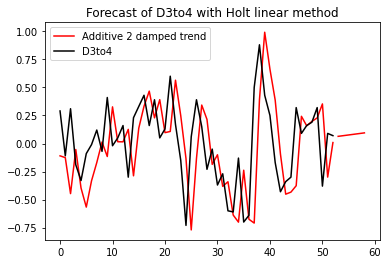

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49         NaN
50         NaN
51         NaN
52         NaN
53   -2.626018
54   -2.766446
55   -2.906874
56   -3.047302
57   -3.187730
58   -3.328159
Name: LowerE, dtype: float64


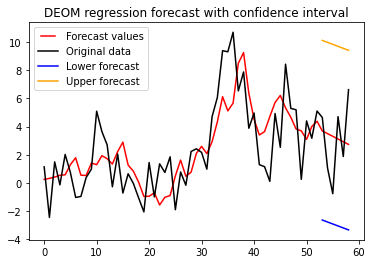

In [14]:
from pandas import read_excel
from statsmodels.tsa.api import Holt
#from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
series = read_excel('/home/shahid/ML/Numerical_analysis/Assistants_share/TimeSeries_AlainZemkoho_course/CodesANDdataSets/4-Regression/Bank.xls',
                    sheet_name='Data2', header=0,
                      dtype=float)

# Reading the basic variables
DEOM = series.DEOM
AAA = series.AAA
Tto4 = series.Tto4
D3to4 = series.D3to4

# Forecasting for AAA using Holt's linear method
fit1 = Holt(AAA).fit(optimized=True)
fcast1 = fit1.forecast(6).rename("Additive 2 damped trend")
fit1.fittedvalues.plot(color='red')
fcast1.plot(color='red', legend=True)
AAA.plot(color='black', legend=True)
plt.title('Forecast of AAA with Holt linear method')
plt.show()

# Forecasting for Tto4 using Holt's linear method
fit2 = Holt(Tto4).fit(optimized=True)
fcast2 = fit2.forecast(6).rename("Additive 2 damped trend")
fit2.fittedvalues.plot(color='red')
fcast2.plot(color='red', legend=True)
Tto4.plot(color='black', legend=True)
plt.title('Forecast of 3to4 with Holt linear method')
plt.show()

# Forecasting for D3to4 using Holt's linear method
fit3 = Holt(D3to4).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
#fit3 = Holt(D3to4).fit(optimized=True)
fcast3 = fit3.forecast(6).rename("Additive 2 damped trend")
fit3.fittedvalues.plot(color='red')
fcast3.plot(color='red', legend=True)
D3to4.plot(color='black', legend=True)
plt.title('Forecast of D3to4 with Holt linear method')
plt.show()

# Building the regression based forecast for main variable, DEOM
# Regression model(s)
formula = 'DEOM ~ AAA + Tto4 + D3to4'

# ols generate statistics and the parameters b0, b1, etc., of the model
results = ols(formula, data=series).fit()
results.summary()
b0 = results.params.Intercept
b1 = results.params.AAA
b2 = results.params.Tto4
b3 = results.params.D3to4

# putting the fitted values of the forecasts of AAA, Tto4, and D3to4 in arrays
a1 = np.array(fit1.fittedvalues)
a2 = np.array(fit2.fittedvalues)
a3 = np.array(fit3.fittedvalues)

# Building the fitted part of the forecast of DEOM
F=a1
for i in range(53):
    F[i] = b0 + a1[i]*b1 + a2[i]*b2 + a3[i]*b3

# putting the values of the forecasts of AAA, Tto4, and D3to4 in arrays
v1=np.array(fcast1)
v2=np.array(fcast2)
v3=np.array(fcast3)

# Building the 6 values of the forecast ahead
E=v1
for i in range(6):
    E[i] = b0 + v1[i]*b1 + v2[i]*b2 + v3[i]*b3


# Joining the fitted values of the forecast and the points ahead
K=np.append(F, E)

# Reading the original DEOM time series for all the 59 periods
DEOMfull0 = read_excel('/home/shahid/ML/Numerical_analysis/Assistants_share/TimeSeries_AlainZemkoho_course/CodesANDdataSets/4-Regression/Bank.xls',
                       sheet_name='Data4', header=0,
                     dtype=float)

###########################
# Evaluating the MSE to generate the confidence interval
DEOMfull = DEOMfull0.DEOMfull
values=DEOMfull[0:53]
Error = values - F
MSE=sum(Error**2)*1.0/len(F)

## Lower and upper bounds of forecasts for z=1.282; see equation (2.2) in Chap 2.
#LowerE = E - 1.282*MSE
#UpperE = E + 1.282*MSE

LowerE = DEOMfull0.LowerE
UpperE = DEOMfull0.UpperE

print(LowerE)
###############################

# Plotting the graphs of K and DEOMfull with legends
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(K, color='red', label='Forecast values')
line2, = plt.plot(DEOMfull, color='black', label='Original data')
line3, = plt.plot(LowerE, color='blue', label='Lower forecast')
line4, = plt.plot(UpperE, color='orange', label='Upper forecast')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.title('DEOM regression forecast with confidence interval')
plt.show()

In [17]:
DEOMfull0['']

,DEOMfull,LowerE,UpperE
0,1.146,NaN,NaN
1,-2.443,NaN,NaN
2,1.497,NaN,NaN
3,-0.132,NaN,NaN
4,2.025,NaN,NaN
5,0.737,NaN,NaN
6,-1.023,NaN,NaN
7,-0.956,NaN,NaN
8,0.385,NaN,NaN
9,0.983,NaN,NaN


# ARIMA

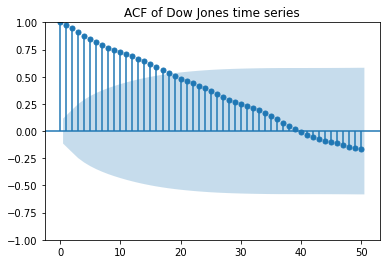

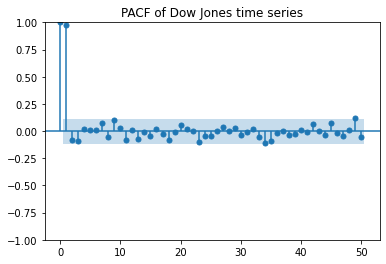

In [20]:
# AcfPacfPlotNonStationarity.py
from pandas import read_excel
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = read_excel('DowJones.xls', sheet_name='Data2', header=0, index_col=0, parse_dates=True)

# ACF plot on 50 time lags
plot_acf(series, title='ACF of Dow Jones time series', lags=50)

# PACF plot on 50 time lags
plot_pacf(series, title='PACF of Dow Jones time series', lags=50)
pyplot.show()

# A white noise model

When testing for suitability, a forecasting model is deemed to be sufficiently well suited to a
particular application if the forecast errors are purely random. The residuals are then described as
white noise. A simple example of a white noise model is given by:

$$ Y_t = c + e_t $$

where:
- c represents a constant overall level.
- $e_t$ is a random error component.

Theoretically, all autocorrelation coefficients for series of random numbers must be zero.
But as we have finite samples, each of the sample’s autocorrelation will not be exactly zero. It
has been shown that, if a time series is white noise, both autocorrelation coefficients and partial
autocorrelation coefficients are approximately independent and normally distributed with mean
zero and standard deviation $(\frac{1}{\sqrt{n}})$, where \(n\) is the number of observations in the series. Hence, it
is useful to plot the ACF and PACF with range $(\pm \frac{1.96}{\sqrt{n}})$, when analyzing what coefficients are
significant or to determine whether data are white noise. If any coefficients lie outside this range,
the data are probably not white noise.


Statistics of the artificially generated series:
count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


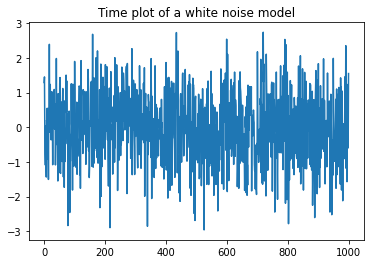

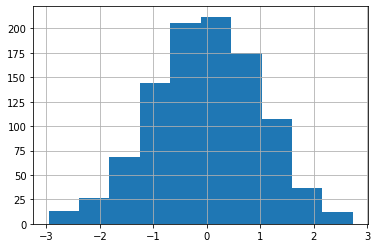

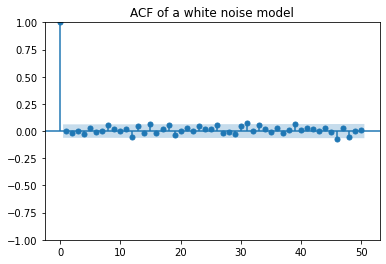

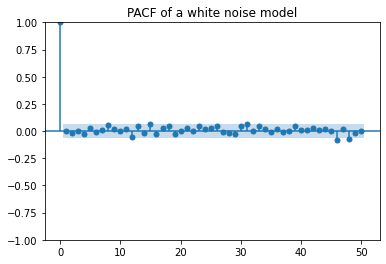

In [24]:
from random import gauss
from random import seed
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]

# Once created, we can wrap the list in a Pandas Series for convenience.
series = Series(series)

# summary statistics of the artificially generated series
print('Statistics of the artificially generated series:')
print(series.describe())

# line plot of the artificially generated series
series.plot(title='Time plot of a white noise model')
pyplot.show()

# histogram plot of the artificially generated series
series.hist()

# ACF plot of an artificially generated white noise time series
plot_acf(series, title='ACF of a white noise model', lags=50)

# PACF plot of an artificially generated white noise time series
plot_pacf(series, title='PACF of a white noise model', lags=50)
pyplot.show()

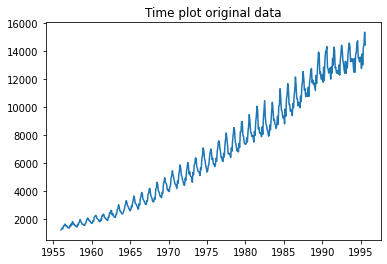

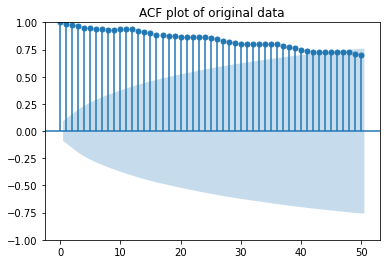

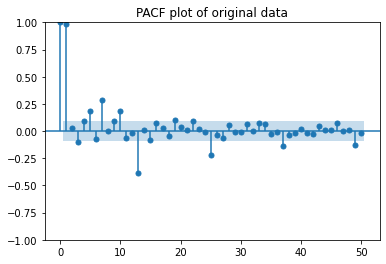

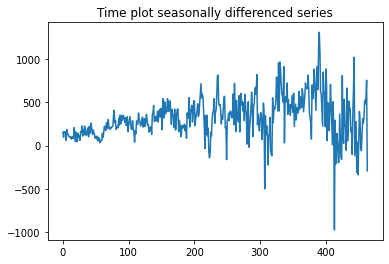

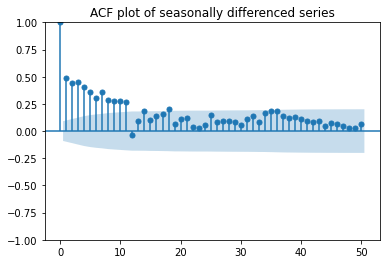

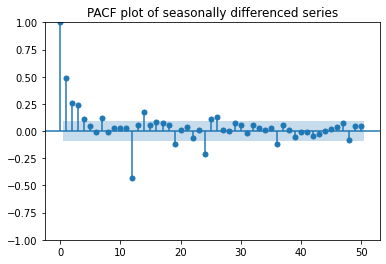

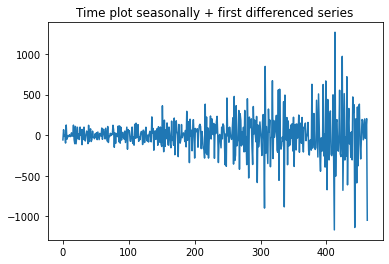

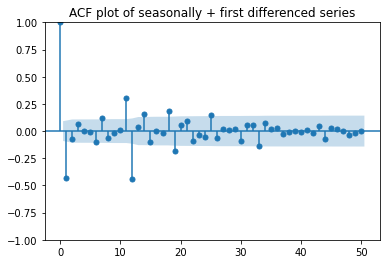

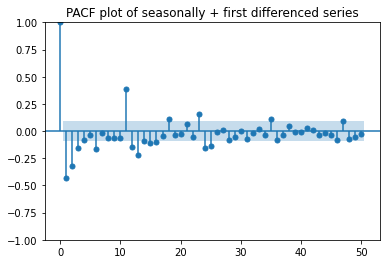

In [26]:
# FirstSeasonalDifference.py
## removing seasonality from time series using seasonal differencing
from pandas import read_excel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

series = read_excel('Electricity.xls', sheet_name='ELEC', header=0, index_col=0, parse_dates=True)

# Time, ACF, and PACF plots for original data
pyplot.plot(series)
pyplot.title('Time plot original data')
plot_acf(series, title='ACF plot of original data', lags=50)
plot_pacf(series, title='PACF plot of original data', lags=50)
pyplot.show()

#  Seaonal difference
X = series.values
SeasDiff = list()
for i in range(12, len(X)):
	value = X[i] - X[i - 12]
	SeasDiff.append(value)

# Time, ACF, and PACF plots for the seasonally differenced series
pyplot.plot(SeasDiff)
pyplot.title('Time plot seasonally differenced series')
plot_acf(SeasDiff, title='ACF plot of seasonally differenced series', lags=50)
plot_pacf(SeasDiff, title='PACF plot of seasonally differenced series', lags=50)
pyplot.show()

### Seasonal + First difference
Y = SeasDiff
SeasFirstDiff = list()
for i in range(1, len(Y)):
	value = Y[i] - Y[i - 1]
	SeasFirstDiff.append(value)
pyplot.plot(SeasFirstDiff)
pyplot.title('Time plot seasonally + first differenced series')
plot_acf(SeasFirstDiff, title='ACF plot of seasonally + first differenced series', lags=50)
plot_pacf(SeasFirstDiff, title='PACF plot of seasonally + first differenced series', lags=50)
pyplot.show()

# Autoregression (AR) models

Models that use the AR equation as described in Section 5.1.1 are termed AR models. They are
classified by the number of time lags, \(p\), used in the autoregression. In general, a \(p\)th order AR
model, or AR(\(p\)) model, is written as:

$$ Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + e_t $$

where:
- c represents a constant overall level.
- $(\phi_j)$ are parameters to be determined.
- $(e_t)$ is the error term.

There are constraints on the allowable values of $(\phi_j)$:
- For $(p = 1)$, $(-1 < \phi_1 < 1)$.
- For \(p = 2\), \(-1 < \phi_2 < 1\), $(\phi_2 + \phi_1 < 1$), and $(\phi_2 - \phi_1 < 1$).
- For $(p \geq 3$), more complicated conditions hold.

An example of an AR(1) model is:

$$ Y_t = 3 + 0.7 Y_{t-1} + e_t $$

where $(e_t$) is normally distributed with mean 0 and variance 1.


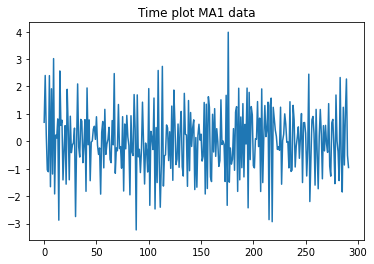

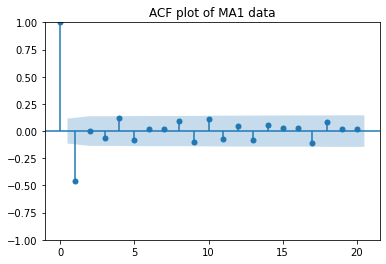

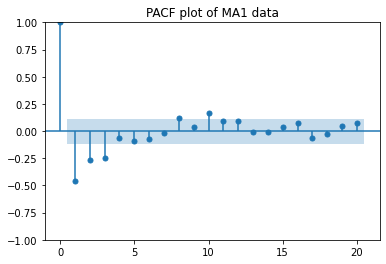

In [27]:
# AcfPacfAR1model.py
from pandas import read_excel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

series = read_excel('DataMA1model.xls', sheet_name='MAdata', usecols = [1],
                    header=0)

# Time, ACF, and PACF plots for original data
pyplot.plot(series)
pyplot.title('Time plot MA1 data')
plot_acf(series, title='ACF plot of MA1 data', lags=20)
plot_pacf(series, title='PACF plot of MA1 data', lags=20)
pyplot.show()

# Moving Average (MA) models

As well as regressing on the observations at previous time lags, as in AR models, we can also regress on the error terms at previous time lags. Such models are called Moving Average (MA) models (nothing to do with the moving average described in Chapter 2). Again, an MA model is classified by the number of time lags, q, used in the regression. A general MA(q) is written as:

$ Y_t = c + e_t - \theta_1 e_{t-1} - \ldots - \theta_q e_{t-q} $

where:
- c is a constant,
- $(\theta_j$) are parameters to be determined, and
- $(e_t$) are the error terms.

As with AR models, there are restrictions on the allowable values of \(\theta_j\):
- For $(q = 1$), $(-1 < \theta_1 < 1$).
- For $(q = 2$), $(-1 < \theta_2 < 1$), $(\theta_2 + \theta_1 < 1$), and $(\theta_2 - \theta_1 < 1$).
- For $(q \geq 3$), more complicated conditions hold.

An example of an MA(1) model is:

$ Y_t = 10 + e_t - 0.7e_{t-1} $

where $(e_t$) is normally distributed with mean 0 and variance 1.


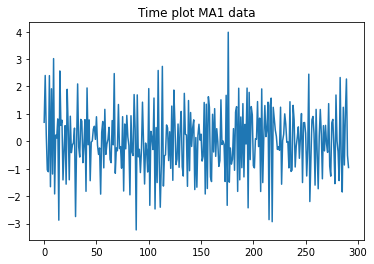

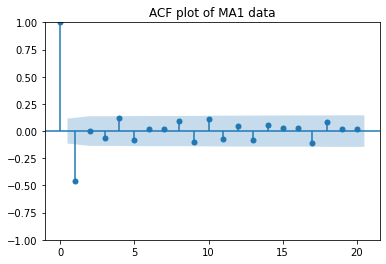

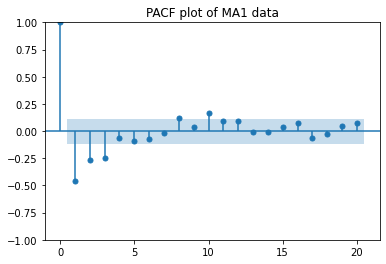

In [28]:
# AcfPacfMA1model.py
from pandas import read_excel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

series = read_excel('DataMA1model.xls', sheet_name='MAdata', usecols = [1],
                    header=0)

# Time, ACF, and PACF plots for original data
pyplot.plot(series)
pyplot.title('Time plot MA1 data')
plot_acf(series, title='ACF plot of MA1 data', lags=20)
plot_pacf(series, title='PACF plot of MA1 data', lags=20)
pyplot.show()

<ipython-input-30-d2a43d9b73fa>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0,


                                     SARIMAX Results                                      
Dep. Variable:                         Production   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1030.968
Date:                            Fri, 26 Apr 2024   AIC                           2069.936
Time:                                    15:02:41   BIC                           2084.054
Sample:                                09-01-1986   HQIC                          2075.617
                                     - 09-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1172      0.134     -0.877      0.380      -0.379       0.145
ma.L1         -0.3691      0.120   

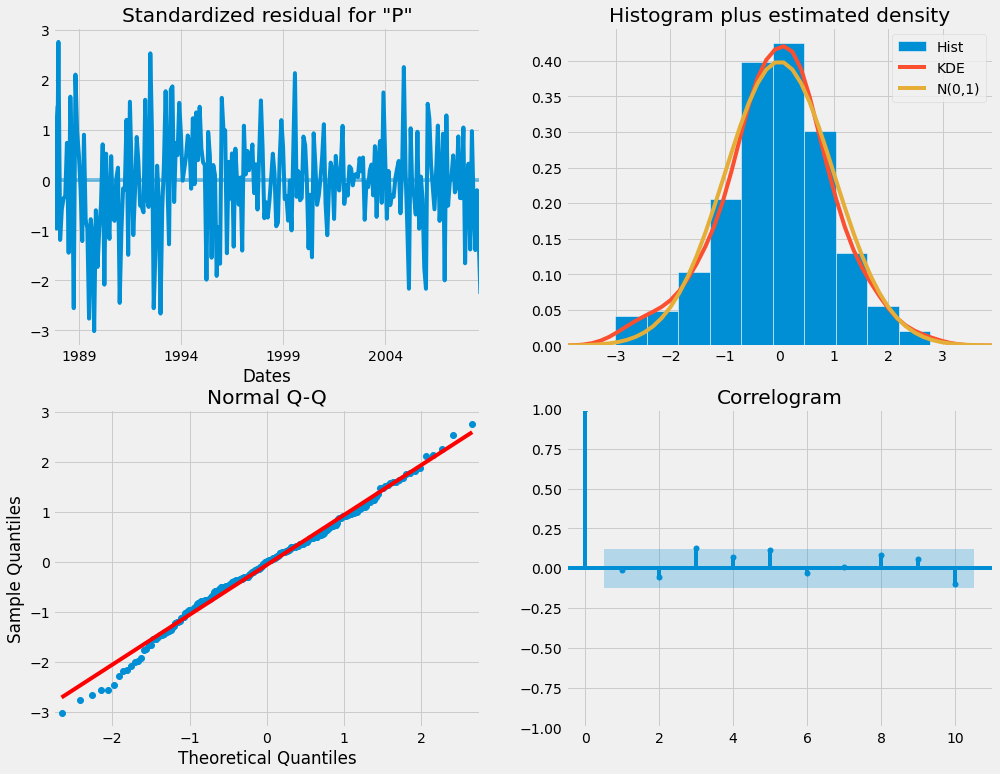

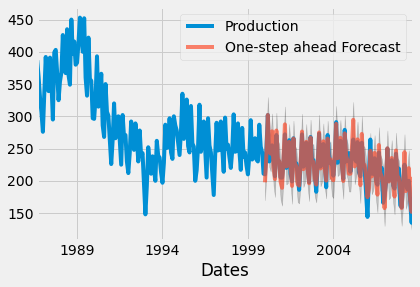

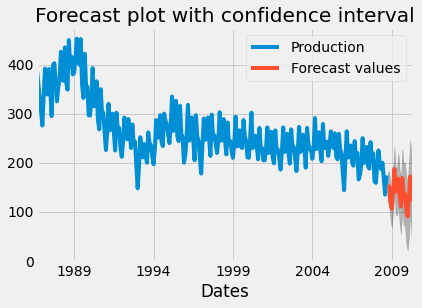

MSE of the forecasts is 2000-01-01 00:00:00   NaN
2000-02-01 00:00:00   NaN
2000-03-01 00:00:00   NaN
2000-04-01 00:00:00   NaN
2000-05-01 00:00:00   NaN
                       ..
2008-06-01 00:00:00   NaN
2008-07-01 00:00:00   NaN
2008-08-01 00:00:00   NaN
2008-09-01 00:00:00   NaN
Production            NaN
Length: 106, dtype: float64


In [30]:
# SARIMAX.py
from pandas import read_excel
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

#==================================================================
#Loading the data set
df = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0,
                index_col=0, parse_dates=True)
df.index.freq = 'MS'
#==================================================================

#==================================================================
#Fitting the ARIMA model and printing related statistics
# ARIMA(0, 1, 1)(0,1,1)12 in this case;
#this one is based on MA1 model template
mod = sm.tsa.statespace.SARIMAX(df, order=(1,1,1), seasonal_order=(0,1,1,12))
results = mod.fit(disp=False)
print(results.summary())
#==================================================================

#GRAPH BLOCK1======================================================
#Printing the graphical statistics of model (correlogram = ACF plot)
results.plot_diagnostics(figsize=(15, 12))
plt.show()
#==================================================================

#GRAPH BLOCK2======================================================
# printing the part of forecasts fitted to original data (for accuracy evaluation)
# the start date has to be provided; hence should be a time within the original time series;
# in this case, it is to start on 01 January 2000
pred = results.get_prediction(start=pd.to_datetime('2000-01-01'), dynamic=False)
pred_ci = pred.conf_int()

# printing one-step ahead forecasts together with the original data set;
# hence, the starting point (year) of the data set is required
# in order to build the plot of original series
ax = df['1986':].plot(label='Original data')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()
#===================================================================

#GRAPH BLOCK3=======================================================
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
# plotting forecasts ahead
ax = df.plot(label='Original data')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast values', title='Forecast plot with confidence interval')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.show()
#====================================================================

#====================================================================
# MSE evaluation
y_forecasted = pred.predicted_mean
y_truth = df['2000-01-01':]
# Compute the mean square error
MSE = ((y_forecasted - y_truth) ** 2).mean()
print('MSE of the forecasts is {}'.format(round(MSE, 2)))
#====================================================================

In [32]:
# AutomaticOrderSARIMAX.py
#===================================================
#Code for identifying the parameters with smallest AIC
#===================================================
from pandas import read_excel
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
plt.style.use('fivethirtyeight')

series = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)

#Define the p, d and q parameters to take any value between 0 and 1
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets (i.e., P, D, Q)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Indentification of best model from different combinations of pdq and seasonal_pdq
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_score, best_param, best_paramSeasonal = float("inf"), None, None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series, order=param, seasonal_order=param_seasonal, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_score:
                best_score, best_param, best_paramSeasonal = results.aic, param, param_seasonal
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('The best model is ARIMA{}x{} - AIC:{}'.format(best_param, best_paramSeasonal, best_score))

<ipython-input-32-2e285c0579ff>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:3718.8589858085606
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3407.9873144305507
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2463.755234631169
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2456.249081845318
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2633.9315172413226
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2625.5089241437695
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2460.0881815689872
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2448.1526057046176
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:3420.3934063821007
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3136.488968672705
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2328.702839352679
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2330.6840807059616
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2487.368288201985
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2489.364173739218
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2330.6909787751633
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2326.8223085390305
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2714.7674515796884
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2529.9678612143043
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC

In [33]:
# AutomaticOrderARIMA.py
#===================================================
#Code for identifying the parameters with smallest AIC
#===================================================
from pandas import read_excel
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools

series = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)

#define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

#generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

#indentification of best model from different combinations of pdq
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_score, best_param = float("inf"), None
for param in pdq:
        try:
            mod = ARIMA(series, param)
            results = mod.fit()
            if results.aic < best_score:
                best_score, best_param = results.aic, param
            print('ARIMA{} - AIC:{}'.format(param, results.aic))
        except:
            continue
print('The best model is ARIMA{} - AIC:{}'.format(best_param, best_score))

The best model is ARIMANone - AIC:inf


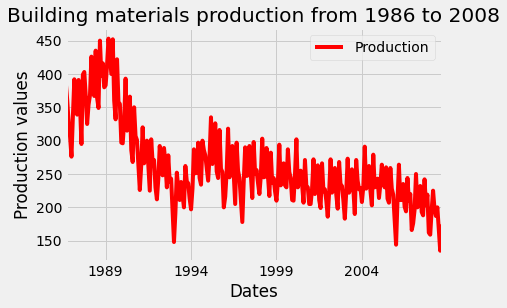

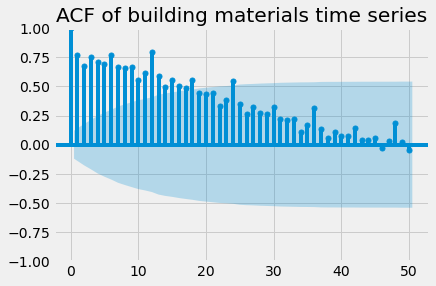

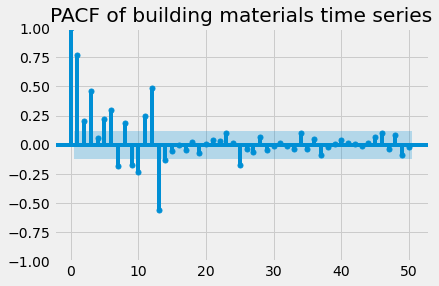

ADF Statistic: -1.754381
p-value: 0.403334
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [36]:
# ADFtest.py
from pandas import read_excel
import matplotlib.pyplot as plt
series = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
series.plot(color='red')
plt.xlabel('Dates')
plt.ylabel('Production values')
plt.title('Building materials production from 1986 to 2008')
plt.show()
#------------------------
from pandas import read_excel
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = read_excel('BuildingMaterials.xls', sheet_name='Data', usecols = [1],
                             header=0, dtype=float)
# ACF plot on 50 time lags
plot_acf(series, title='ACF of building materials time series', lags=50)

# PACF plot on 50 time lags
plot_pacf(series, title='PACF of building materials time series', lags=50)
pyplot.show()
#--------------------------------------------------
# calculate stationarity test of time series data
#from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
#series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))